**CREDIT RISK MODELLING USING MACHINE LEARNING**

This notebook explores credit risk assessment using the German Credit Dataset, with the objective of classifying loan applicants as either good or bad credit risks based on demographic and financial features.

A transformer-based deep learning model is developed and benchmarked against other widely used algorithms, including LSTM, Random Forest, Logistic Regression, and Support Vector Machine (SVM). These models are trained and evaluated under the same conditions to ensure fair comparison.

Performance is assessed using key classification metrics: AUC, KS statistic, and Geometric Mean (G-Mean). These metrics provide a comprehensive view of model discrimination, balance, and robustness, especially in imbalanced settings. This work demonstrates the potential of attention-based architectures in improving the effectiveness of credit scoring models.

**Data Preparation and Exploratory Analysis**

In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install ucimlrepo

In [3]:
import pandas as pd

# Read the ASCII file into a DataFrame
df = pd.read_csv("/content/SouthGermanCredit.asc", sep=" ", skipinitialspace=True)

# Display the first few rows of the DataFrame
print(df.head())



   laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0         1        18      4     2   1049         1        2     4       2   
1         1         9      4     0   2799         1        3     2       3   
2         2        12      2     9    841         2        4     2       2   
3         1        12      4     0   2122         1        3     3       3   
4         1        12      4     0   2171         1        3     4       3   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0       1  ...     2     21         3     1         1      3     2      1   
1       1  ...     1     36         3     1         2      3     1      1   
2       1  ...     1     23         3     1         1      2     2      1   
3       1  ...     1     39         3     1         2      2     1      1   
4       1  ...     2     38         1     2         2      2     2      1   

   gastarb  kredit  
0        2       1  
1        2       1  
2    

In [4]:
# Display summary information about the DataFrame
# Shows number of rows, columns, data types, and non-null counts
# Useful to check for missing values and understand data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [5]:
# Translation dictionary for column names
translation_dict = {
    "laufkont": "checking_account_status",
    "laufzeit": "duration_in_months",
    "moral": "credit_history",
    "verw": "purpose",
    "hoehe": "credit_amount",
    "sparkont": "savings_account_bonds",
    "beszeit": "employment_since",
    "rate": "installment_rate",
    "famges": "personal_status_and_sex",
    "buerge": "other_debtors_guarantors",
    "wohnzeit": "present_residence_since",
    "verm": "property",
    "alter": "age_in_years",
    "weitkred": "other_installment_plans",
    "wohn": "housing",
    "bishkred": "number_of_existing_credits_at_this_bank",
    "beruf": "job",
    "pers": "number_of_people_being_liable",
    "telef": "telephone",
    "gastarb": "foreign_worker",
    "kredit": "credit"
}

# Rename the columns in the DataFrame
df.rename(columns=translation_dict, inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   checking_account_status                  1000 non-null   int64  
 1   duration_in_months                       1000 non-null   int64  
 2   credit_history                           1000 non-null   int64  
 3   purpose                                  1000 non-null   int64  
 4   credit_amount                            1000 non-null   int64  
 5   savings_account_bonds                    1000 non-null   int64  
 6   employment_since                         1000 non-null   int64  
 7   installment_rate                         1000 non-null   int64  
 8   personal_status_and_sex                  1000 non-null   int64  
 9   other_debtors_guarantors                 1000 non-null   int64  
 10  present_residence_since                  1000 non

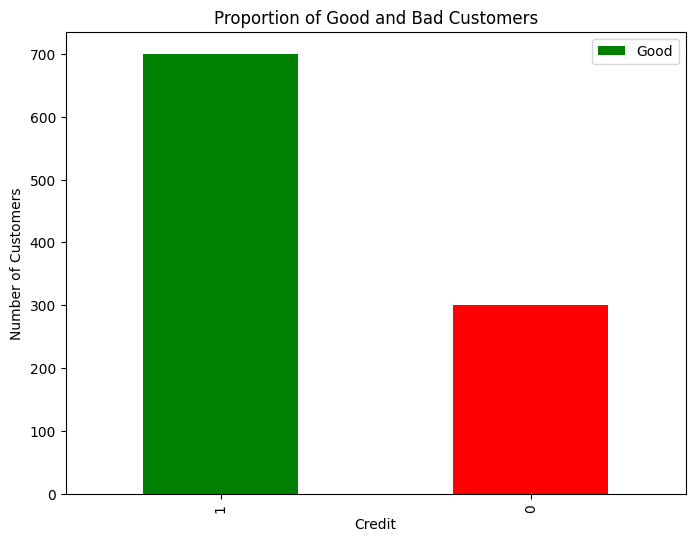

In [ ]:
# Visualize the distribution of good vs. bad credit customers

import matplotlib.pyplot as plt

# Count the number of good and bad customers
credit_counts = df['credit'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
credit_counts.plot(kind='bar', color=['green', 'red'])

# Add labels and title
plt.title('Proportion of Good and Bad Customers')
plt.xlabel('Credit')
plt.ylabel('Number of Customers')

# Add legend
plt.legend(['Good', 'Bad'], loc='upper right')

# Show plot
plt.show()


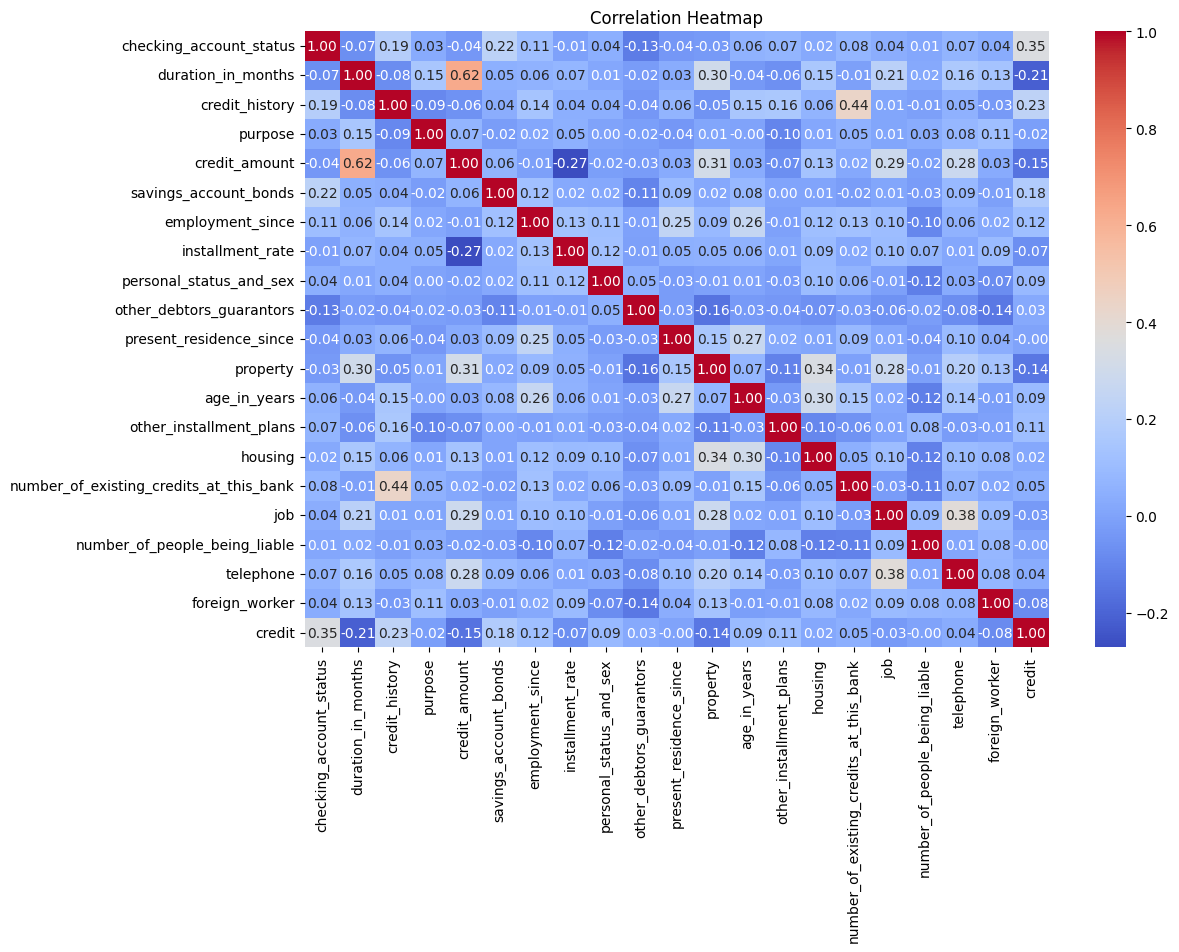

In [8]:
# Generate a correlation heatmap to visualize relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-13-422299981>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['credit'] == 1], x='log_credit_amount', label='Good Credit', shade=True)
<ipython-input-13-422299981>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['credit'] == 0], x='log_credit_amount', label='Bad Credit', shade=True)


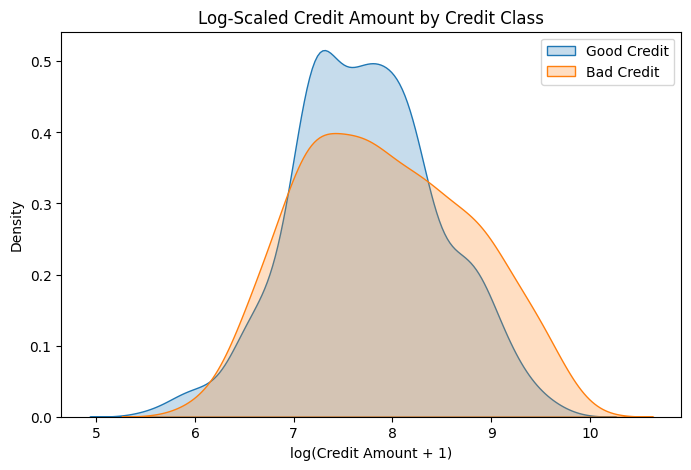

In [13]:
# Plot the distribution of credit amounts by credit class using log scale
# Helps reveal how large or small credit requests relate to good/bad credit
import numpy as np

df['log_credit_amount'] = np.log1p(df['credit_amount'])  # log-transform to reduce skew

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['credit'] == 1], x='log_credit_amount', label='Good Credit', shade=True)
sns.kdeplot(data=df[df['credit'] == 0], x='log_credit_amount', label='Bad Credit', shade=True)
plt.title("Log-Scaled Credit Amount by Credit Class")
plt.xlabel("log(Credit Amount + 1)")
plt.legend()
plt.show()


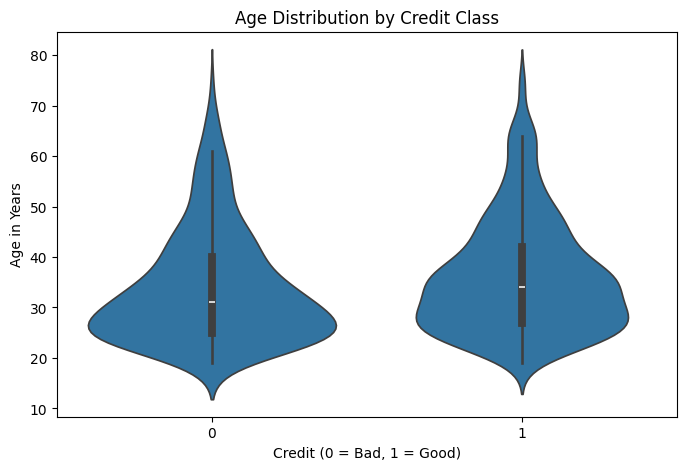

In [14]:
# Show how age is distributed for good vs. bad credit classes
# Violin plot provides a richer visual than a boxplot or mean alone
plt.figure(figsize=(8, 5))
sns.violinplot(x='credit', y='age_in_years', data=df)
plt.title("Age Distribution by Credit Class")
plt.xlabel("Credit (0 = Bad, 1 = Good)")
plt.ylabel("Age in Years")
plt.show()


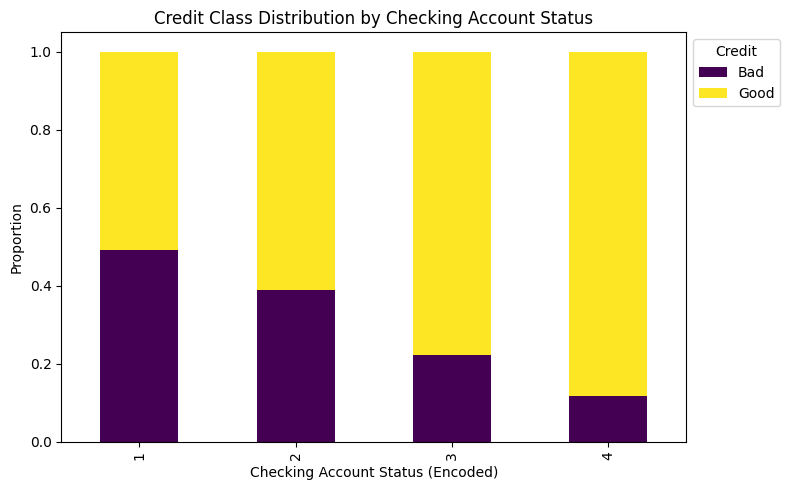

In [16]:
# Visualize the proportion of good vs. bad credit across different checking account statuses
# Highlights how financial access/status relates to creditworthiness
grouped = pd.crosstab(df['checking_account_status'], df['credit'], normalize='index')

ax = grouped.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title("Credit Class Distribution by Checking Account Status")
plt.ylabel("Proportion")
plt.xlabel("Checking Account Status (Encoded)")
plt.legend(title='Credit', labels=['Bad', 'Good'], loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



**Model Building and Evaluation**

This section covers the development of the Transformer-based model and comparison algorithms, followed by evaluation using various performance metrics such as KS statistic, AUC, and G-mean.



**GRU Transformer Model Best**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score

# Define features and target
features = [
    'checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_guarantors', 'present_residence_since', 'property', 'age_in_years',
    'other_installment_plans', 'housing', 'number_of_existing_credits_at_this_bank', 'job',
    'number_of_people_being_liable', 'telephone', 'foreign_worker'
]
target = 'credit'

# Preprocess the data
X = df[features]
y = df[target].astype(int)  # Ensure the target is integer for classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to 3D for Transformer model input
X_3d = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_3d, y, test_size=0.2, random_state=42)

# Define the Transformer model architecture
def create_transformer_model():
    input_shape = (X_train.shape[1], X_train.shape[2])
    inputs = layers.Input(shape=input_shape)
    x = layers.Bidirectional(layers.GRU(128, return_sequences=True, dropout=0.1))(inputs)
    for _ in range(1):
        attention_output = layers.MultiHeadAttention(num_heads=12, key_dim=32)(x, x)
        attention_output = layers.Dropout(0.3)(attention_output)
        x = layers.Add()([attention_output, x])
        x = layers.LayerNormalization()(x)
    x_flatten = layers.Flatten()(x)
    outputs = layers.Dense(1, activation="sigmoid")(x_flatten)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_transformer_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Predict and evaluate the model
y_pred_transformer = model.predict(X_test).flatten()  # Renamed for clarity
y_pred_classes_transformer = (y_pred_transformer > 0.5).astype(int)  # Renamed for clarity

# Compute metrics and print results
accuracy = accuracy_score(y_test, y_pred_classes_transformer)
precision = precision_score(y_test, y_pred_classes_transformer)
recall = recall_score(y_test, y_pred_classes_transformer)
f1 = f1_score(y_test, y_pred_classes_transformer)
roc_auc = roc_auc_score(y_test, y_pred_transformer)
average_precision = average_precision_score(y_test, y_pred_transformer)
geometric_mean = geometric_mean_score(y_test, y_pred_classes_transformer)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_transformer)
ks_statistic = np.max(np.abs(tpr - fpr))

# Print the metrics and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.6399 - loss: 0.7185 - val_accuracy: 0.7375 - val_loss: 0.6033
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7284 - loss: 0.5893 - val_accuracy: 0.7250 - val_loss: 0.5151
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7386 - loss: 0.5273 - val_accuracy: 0.7625 - val_loss: 0.4483
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7281 - loss: 0.5210 - val_accuracy: 0.7625 - val_loss: 0.4831
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7636 - loss: 0.4940 - val_accuracy: 0.7625 - val_loss: 0.4714
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7525 - loss: 0.4811 - val_accuracy: 0.7250 - val_loss: 0.5030
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7672 - loss: 0.5003 - val_accuracy: 0.7750 - val_loss: 0.4812
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7843 - loss: 0.4641 - val_accuracy: 

**GRU Model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score

# === Load and Prepare Data ===

# Define features and target
features = [
    'checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_guarantors', 'present_residence_since', 'property', 'age_in_years',
    'other_installment_plans', 'housing', 'number_of_existing_credits_at_this_bank', 'job',
    'number_of_people_being_liable', 'telephone', 'foreign_worker'
]
target = 'credit'

# Preprocess the data
X = df[features]
y = df[target].astype(int)  # Ensure the target is an integer for classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to 3D for GRU input
X_3d = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_3d, y, test_size=0.2, random_state=42)

# === Define GRU-Only Model ===
def create_gru_model():
    input_shape = (X_train.shape[1], X_train.shape[2])
    inputs = layers.Input(shape=input_shape)

    # Only GRU, no Transformer
    x = layers.Bidirectional(layers.GRU(128, return_sequences=True, dropout=0.1))(inputs)
    x_flatten = layers.Flatten()(x)
    outputs = layers.Dense(1, activation="sigmoid")(x_flatten)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Train GRU-Only Model
model_gru = create_gru_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_gru = model_gru.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Predictions
y_pred_gru = model_gru.predict(X_test).flatten()
y_pred_classes_gru = (y_pred_gru > 0.5).astype(int)

# === Compute Metrics ===
accuracy_gru = accuracy_score(y_test, y_pred_classes_gru)
precision_gru = precision_score(y_test, y_pred_classes_gru)
recall_gru = recall_score(y_test, y_pred_classes_gru)
f1_gru = f1_score(y_test, y_pred_classes_gru)
roc_auc_gru = roc_auc_score(y_test, y_pred_gru)
average_precision_gru = average_precision_score(y_test, y_pred_gru)
geometric_mean_gru = geometric_mean_score(y_test, y_pred_classes_gru)
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_gru)
ks_statistic_gru = np.max(np.abs(tpr_gru - fpr_gru))

# Print results
print("\n=== GRU-Only Model Performance on German Dataset ===")
print(f"Accuracy: {accuracy_gru:.4f}")
print(f"Precision: {precision_gru:.4f}")
print(f"Recall: {recall_gru:.4f}")
print(f"F1 Score: {f1_gru:.4f}")
print(f"AUC: {roc_auc_gru:.4f}")
print(f"AUC PR: {average_precision_gru:.4f}")
print(f"Geometric Mean: {geometric_mean_gru:.4f}")
print(f"KS Statistic: {ks_statistic_gru:.4f}")


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.5469 - loss: 0.6753 - val_accuracy: 0.7250 - val_loss: 0.5935
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7437 - loss: 0.5824 - val_accuracy: 0.7250 - val_loss: 0.5392
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7692 - loss: 0.5363 - val_accuracy: 0.7375 - val_loss: 0.5088
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7668 - loss: 0.5118 - val_accuracy: 0.7375 - val_loss: 0.4885
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7730 - loss: 0.4659 - val_accuracy: 0.7375 - val_loss: 0.4791
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7848 - loss: 0.4865 - val_accuracy: 0.7250 - val_loss: 0.4703
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7868 - loss: 0.4661 - val_accuracy: 0.7625 - val_loss: 0.4669
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7805 - loss: 0.4802 - val_accuracy: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step

=== GRU-Only Model Performance on German Dataset ===
Accuracy: 0.7600
Precision: 0.7885
Recall: 0.8913
F1 Score: 0.8367
AUC: 0.7914
AUC PR: 0.8736
Geometric Mean: 0.6457
KS Statistic: 0.5238


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score

# Assuming 'df' is your DataFrame containing the dataset

# Define features and target
features = [
    'checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_guarantors', 'present_residence_since', 'property', 'age_in_years',
    'other_installment_plans', 'housing', 'number_of_existing_credits_at_this_bank', 'job',
    'number_of_people_being_liable', 'telephone', 'foreign_worker'
]
target = 'credit'

# Preprocess the data
X = df[features]
y = df[target].astype(int)  # Ensure the target is integer for classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to 3D for Transformer model input
X_3d = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_3d, y, test_size=0.2, random_state=42)

# Define the Transformer model architecture
def create_transformer_model(transformer_blocks=1, attention_heads=12, batch_size=64):
    input_shape = (X_train.shape[1], X_train.shape[2])
    inputs = layers.Input(shape=input_shape)
    x = layers.Bidirectional(layers.GRU(128, return_sequences=True, dropout=0.1))(inputs)
    for _ in range(transformer_blocks):
        attention_output = layers.MultiHeadAttention(num_heads=attention_heads, key_dim=32)(x, x)
        attention_output = layers.Dropout(0.3)(attention_output)
        x = layers.Add()([attention_output, x])
        x = layers.LayerNormalization()(x)
    x_flatten = layers.Flatten()(x)
    outputs = layers.Dense(1, activation="sigmoid")(x_flatten)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Adjust the hyperparameters here
transformer_blocks = 1  # Example: Change this value manually
attention_heads =  6   # Example: Change this value manually
batch_size = 32         # Example: Change this value manually

model = create_transformer_model(transformer_blocks=transformer_blocks, attention_heads=attention_heads, batch_size=batch_size)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=40, batch_size=batch_size, validation_split=0.1, callbacks=[early_stopping])

# Extract validation predictions
val_split_index = int((1 - 0.1) * len(X_train))  # Last 10% of the training data used as validation set
X_val, y_val = X_train[val_split_index:], y_train[val_split_index:]

y_val_pred_transformer = model.predict(X_val).flatten()
y_val_pred_classes_transformer = (y_val_pred_transformer > 0.5).astype(int)

# Compute validation set metrics
val_accuracy = accuracy_score(y_val, y_val_pred_classes_transformer)
val_precision = precision_score(y_val, y_val_pred_classes_transformer)
val_recall = recall_score(y_val, y_val_pred_classes_transformer)
val_f1 = f1_score(y_val, y_val_pred_classes_transformer)
val_roc_auc = roc_auc_score(y_val, y_val_pred_transformer)
val_geometric_mean = geometric_mean_score(y_val, y_val_pred_classes_transformer)
val_fpr, val_tpr, val_thresholds = roc_curve(y_val, y_val_pred_transformer)
val_ks_statistic = np.max(np.abs(val_tpr - val_fpr))

# Predict and evaluate the model on the test set
y_pred_transformer = model.predict(X_test).flatten()
y_pred_classes_transformer = (y_pred_transformer > 0.5).astype(int)

# Compute test set metrics
accuracy = accuracy_score(y_test, y_pred_classes_transformer)
precision = precision_score(y_test, y_pred_classes_transformer)
recall = recall_score(y_test, y_pred_classes_transformer)
f1 = f1_score(y_test, y_pred_classes_transformer)
roc_auc = roc_auc_score(y_test, y_pred_transformer)
average_precision = average_precision_score(y_test, y_pred_transformer)
geometric_mean = geometric_mean_score(y_test, y_pred_classes_transformer)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_transformer)
ks_statistic = np.max(np.abs(tpr - fpr))

# Print validation metrics
print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1 Score: {val_f1}")
print(f"Validation ROC AUC: {val_roc_auc}")
print(f"Validation Geometric Mean: {val_geometric_mean}")
print(f"Validation KS Statistic: {val_ks_statistic}")

# Print test metrics
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")
print(f"Test Recall: {recall}")
print(f"Test F1 Score: {f1}")
print(f"Test ROC AUC: {roc_auc}")
print(f"Test AUC PR: {average_precision}")
print(f"Test Geometric Mean: {geometric_mean}")
print(f"Test KS Statistic: {ks_statistic}")


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 6, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.6536 - loss: 0.6777 - val_accuracy: 0.7375 - val_loss: 0.4964
Epoch 2/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7536 - loss: 0.5242 - val_accuracy: 0.7500 - val_loss: 0.4949
Epoch 3/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7738 - loss: 0.5059 - val_accuracy: 0.7875 - val_loss: 0.5031
Epoch 4/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7825 - loss: 0.4754 - val_accuracy: 0.7625 - val_loss: 0.4772
Epoch 5/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7789 - loss: 0.4787 - val_accuracy: 0.7250 - val_loss: 0.4828
Epoch 6/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7601 - loss: 0.5040 - val_accuracy: 0.7375 - val_loss: 0.5035
Epoch 7/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7593 - loss: 0.4859 - val_accuracy: 0.7375 - val_loss: 0.4696
Epoch 8/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7748 - loss: 0.4671 - val_accuracy: 0.7500 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 6, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Validation Accuracy: 0.775
Validation Precision: 0.828125
Validation Recall: 0.8833333333333333
Validation F1 Score: 0.8548387096774193
Validation ROC AUC: 0.7941666666666667
Validation Geometric Mean: 0.6304760106459245
Validation KS Statistic: 0.49999999999999994
Test Accuracy: 0.77
Test Precision: 0.8026315789473685
Test Recall: 0.8840579710144928
Test F1 Score: 0.8413793103448277
Test ROC AUC: 0.7905563347358578
Test AUC PR: 0.8776239317395993
Test Geometric Mean: 0.6754909215080083
Test KS Statistic: 0.5189340813464236


**LSTM MODEL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score

# Assuming 'df' is your DataFrame containing the dataset

# Define features and target
features = [
    'checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_guarantors', 'present_residence_since', 'property', 'age_in_years',
    'other_installment_plans', 'housing', 'number_of_existing_credits_at_this_bank', 'job',
    'number_of_people_being_liable', 'telephone', 'foreign_worker'
]
target = 'credit'

# Preprocess the data
X = df[features]
y = df[target].astype(int)  # Ensure the target is integer for classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to 3D for LSTM model input
X_3d = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_3d, y, test_size=0.2, random_state=42)

# Define the LSTM model architecture
def create_lstm_model():
    input_shape = (X_train.shape[1], X_train.shape[2])  # Shape of the input (1, number of features)
    inputs = layers.Input(shape=input_shape)
    x = layers.LSTM(256, return_sequences=True, dropout=0.2)(inputs)
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_lstm_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Predict and evaluate the model
y_pred_lstm = model.predict(X_test).flatten()  # Renamed for clarity
y_pred_classes_lstm = (y_pred_lstm > 0.5).astype(int)  # Renamed for clarity

# Compute confusion matrix and additional metrics
accuracy = accuracy_score(y_test, y_pred_classes_lstm)
precision = precision_score(y_test, y_pred_classes_lstm)
recall = recall_score(y_test, y_pred_classes_lstm)
f1 = f1_score(y_test, y_pred_classes_lstm)
roc_auc = roc_auc_score(y_test, y_pred_lstm)
average_precision = average_precision_score(y_test, y_pred_lstm)
geometric_mean = geometric_mean_score(y_test, y_pred_classes_lstm)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lstm)
ks_statistic = np.max(np.abs(tpr - fpr))

# Print the metrics and confusion matrix
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


Epoch 1/40
12/12 [==============================] - 3s 71ms/step - loss: 0.6670 - accuracy: 0.6347 - val_loss: 0.6400 - val_accuracy: 0.7125
Epoch 2/40
12/12 [==============================] - 0s 13ms/step - loss: 0.6211 - accuracy: 0.7250 - val_loss: 0.5975 - val_accuracy: 0.7625
Epoch 3/40
12/12 [==============================] - 0s 15ms/step - loss: 0.5823 - accuracy: 0.7236 - val_loss: 0.5634 - val_accuracy: 0.7500
Epoch 4/40
12/12 [==============================] - 0s 13ms/step - loss: 0.5494 - accuracy: 0.7458 - val_loss: 0.5339 - val_accuracy: 0.7500
Epoch 5/40
12/12 [==============================] - 0s 14ms/step - loss: 0.5421 - accuracy: 0.7472 - val_loss: 0.5111 - val_accuracy: 0.7375
Epoch 6/40
12/12 [==============================] - 0s 15ms/step - loss: 0.5201 - accuracy: 0.7417 - val_loss: 0.4960 - val_accuracy: 0.7250
Epoch 7/40
12/12 [==============================] - 0s 15ms/step - loss: 0.5065 - accuracy: 0.7611 - val_loss: 0.4860 - val_accuracy: 0.7500
Epoch 8/40
12

**Bidirectional-LSTM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score

# Assuming 'df' is your DataFrame containing the dataset

# Define features and target
features = [
    'checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_guarantors', 'present_residence_since', 'property', 'age_in_years',
    'other_installment_plans', 'housing', 'number_of_existing_credits_at_this_bank', 'job',
    'number_of_people_being_liable', 'telephone', 'foreign_worker'
]
target = 'credit'

# Preprocess the data
X = df[features]
y = df[target].astype(int)  # Ensure the target is integer for classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to 3D for LSTM model input
X_3d = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_3d, y, test_size=0.2, random_state=42)

# Define the Bidirectional LSTM model architecture
def create_bidirectional_lstm_model():
    input_shape = (X_train.shape[1], X_train.shape[2])  # Shape of the input (1, number of features)
    inputs = layers.Input(shape=input_shape)
    x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.2))(inputs)
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_bidirectional_lstm_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Predict and evaluate the model
y_pred = model.predict(X_test).flatten()
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute confusion matrix and redefine TP, TN according to your definition
cm = confusion_matrix(y_test, y_pred_classes)
tn, fp, fn, tp = cm.ravel()  # Here, TN is correctly predicting defaults (0), and TP is correctly predicting non-defaults (1)

# Compute additional metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
geometric_mean = geometric_mean_score(y_test, y_pred_classes)

# Compute TPR and FPR for KS statistic
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks_statistic = np.max(np.abs(tpr - fpr))

# Print the metrics and confusion matrix
print(f"Confusion Matrix: \n{cm}")
print(f"TN (correct default predictions): {tn}, FP (misclassified non-default as default): {fp}")
print(f"FN (misclassified default as non-default): {fn}, TP (correct non-default predictions): {tp}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


Epoch 1/40
12/12 [==============================] - 6s 145ms/step - loss: 0.6598 - accuracy: 0.6861 - val_loss: 0.6235 - val_accuracy: 0.7125
Epoch 2/40
12/12 [==============================] - 0s 21ms/step - loss: 0.5944 - accuracy: 0.7278 - val_loss: 0.5732 - val_accuracy: 0.7250
Epoch 3/40
12/12 [==============================] - 0s 18ms/step - loss: 0.5500 - accuracy: 0.7472 - val_loss: 0.5328 - val_accuracy: 0.7375
Epoch 4/40
12/12 [==============================] - 0s 20ms/step - loss: 0.5224 - accuracy: 0.7500 - val_loss: 0.5055 - val_accuracy: 0.7250
Epoch 5/40
12/12 [==============================] - 0s 19ms/step - loss: 0.5029 - accuracy: 0.7639 - val_loss: 0.4902 - val_accuracy: 0.7375
Epoch 6/40
12/12 [==============================] - 0s 20ms/step - loss: 0.4902 - accuracy: 0.7708 - val_loss: 0.4822 - val_accuracy: 0.7375
Epoch 7/40
12/12 [==============================] - 0s 22ms/step - loss: 0.4875 - accuracy: 0.7694 - val_loss: 0.4715 - val_accuracy: 0.7375
Epoch 8/40
1

**CNN-SFT with Gaussian Tokenization Module**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score

# Assuming 'df' is your DataFrame containing the dataset

# Define features and target
features = [
    'checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_guarantors', 'present_residence_since', 'property', 'age_in_years',
    'other_installment_plans', 'housing', 'number_of_existing_credits_at_this_bank', 'job',
    'number_of_people_being_liable', 'telephone', 'foreign_worker'
]
target = 'credit'

# Preprocess the data
X = df[features]
y = df[target].astype(int)  # Ensure the target is integer for classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to 3D for Transformer model input
X_3d = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_3d, y, test_size=0.2, random_state=42)

# Gaussian Weight Tokenization Layer
class GaussianWeightTokenization(layers.Layer):
    def __init__(self, num_tokens, **kwargs):
        super().__init__(**kwargs)
        self.num_tokens = num_tokens

    def build(self, input_shape):
        self.Wf = self.add_weight(shape=(input_shape[-1], self.num_tokens),
                                  initializer='random_normal',
                                  trainable=True)
        self.Wg = self.add_weight(shape=(input_shape[-1], self.num_tokens),
                                  initializer='random_normal',
                                  trainable=True)

    def call(self, inputs):
        # Gaussian-weighted tokenization
        Q = tf.nn.softmax(inputs @ self.Wf, axis=-1)
        K = tf.nn.softmax(inputs @ self.Wg, axis=-1)
        V = inputs  # typically, V might be processed differently, this is simplified
        return Q, K, V

# Define the CNN-SFTransformer model architecture
def create_cnn_sftransformer_model():
    input_shape = (X_train.shape[1], X_train.shape[2])
    inputs = layers.Input(shape=input_shape)

    # CNN branch
    cnn = layers.Conv1D(filters=16, kernel_size=1, activation='relu')(inputs)
    cnn = layers.Conv1D(filters=32, kernel_size=1, activation='relu')(cnn)
    cnn = layers.GlobalMaxPooling1D()(cnn)

    # SFTransformer branch
    gwt = GaussianWeightTokenization(num_tokens=32)(inputs)
    sf_transformer = layers.MultiHeadAttention(num_heads=16, key_dim=32)(gwt[0], gwt[1], gwt[2])
    sf_transformer = layers.LayerNormalization(epsilon=1e-6)(sf_transformer)
    sf_transformer = layers.Flatten()(sf_transformer)

    # Concatenate CNN and SFTransformer branches
    concatenated = layers.Concatenate()([cnn, sf_transformer])

    # Fully connected layers
    dense = layers.Dense(64, activation='relu')(concatenated)
    dense = layers.Dropout(0.1)(dense)
    outputs = layers.Dense(1, activation='sigmoid')(dense)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_sftransformer_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Predict and evaluate the model
y_pred = model.predict(X_test).flatten()
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute confusion matrix and additional metrics
cm = confusion_matrix(y_test, y_pred_classes)
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
geometric_mean = geometric_mean_score(y_test, y_pred_classes)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks_statistic = np.max(np.abs(tpr - fpr))

# Print the metrics and confusion matrix
print(f"Confusion Matrix: \n{cm}")
print(f"TN (correct default predictions): {tn}, FP (misclassified non-default as default): {fp}")
print(f"FN (misclassified default as non-default): {fn}, TP (correct non-default predictions): {tp}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6650 - loss: 0.6448 - val_accuracy: 0.7500 - val_loss: 0.5277
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7007 - loss: 0.5672 - val_accuracy: 0.7750 - val_loss: 0.5156
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7349 - loss: 0.5335 - val_accuracy: 0.7625 - val_loss: 0.5064
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7468 - loss: 0.5217 - val_accuracy: 0.7625 - val_loss: 0.4809
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7413 - loss: 0.4757 - val_accuracy: 0.7875 - val_loss: 0.4756
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7455 - loss: 0.5092 - val_accuracy: 0.7625 - val_loss: 0.4801
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7698 - loss: 0.4870 - val_accuracy: 0.7750 - val_loss: 0.4669
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7902 - loss: 0.4863 - val_accuracy: 0.

**CNN-SFTransformer MCnemar test**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.metrics import geometric_mean_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, MaxPooling1D, Flatten, Dense, Add, MultiHeadAttention, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define features and target
features = [
    'checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_guarantors', 'present_residence_since', 'property', 'age_in_years',
    'other_installment_plans', 'housing', 'number_of_existing_credits_at_this_bank', 'job',
    'number_of_people_being_liable', 'telephone', 'foreign_worker'
]
target = 'credit'

# Load dataset (Ensure df is already loaded)
X = df[features]
y = df[target].astype(int)  # Ensure the target is integer for classification

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to three-dimensional data using a sliding window
def create_3d_sequences(data, window_size, step_size):
    sequences = []
    for i in range(0, len(data) - window_size + 1, step_size):
        sequences.append(data[i:i+window_size])
    return np.array(sequences)

window_size = 1  # Sliding window length of 1
step_size = 1    # Step size of 1
X_3d = create_3d_sequences(X_scaled, window_size, step_size)
y_3d = y[window_size - 1::step_size]

# Check the shape of the resulting 3D sequences
print(f'Shape of X_3d: {X_3d.shape}')  # Should be (samples, window_size, features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_3d, y_3d, test_size=0.2, stratify=y_3d)

# CNN Component
def create_cnn_component(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(16, kernel_size=1, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=1)(x)
    x = Conv1D(16, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=1)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    return model

# SFTransformer Component
def create_sftransformer_component(input_shape):
    inputs = Input(shape=input_shape)
    attention = MultiHeadAttention(num_heads=10, key_dim=input_shape[-1])(inputs, inputs)
    attention = Add()([inputs, attention])
    attention = LayerNormalization()(attention)
    outputs = Flatten()(attention)
    outputs = Dense(256, activation='relu')(outputs)
    outputs = Dense(1, activation='sigmoid')(outputs)
    model = Model(inputs, outputs)
    return model

# Combined CNN-SFTransformer Model
def create_cnn_sftransformer_model(input_shape):
    cnn_model = create_cnn_component(input_shape)
    sftransformer_model = create_sftransformer_component(input_shape)

    combined_input = Input(shape=input_shape)
    cnn_output = cnn_model(combined_input)
    sftransformer_output = sftransformer_model(combined_input)

    combined_output = Add()([cnn_output, sftransformer_output])
    combined_output = Dense(1, activation='sigmoid')(combined_output)

    model = Model(combined_input, combined_output)
    return model

input_shape = (window_size, X_3d.shape[2])
model = create_cnn_sftransformer_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Predictions and evaluation
y_pred_transformer22 = model.predict(X_test).ravel()
y_pred_classes_transformer22 = (y_pred_transformer22 > 0.5).astype(int)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes_transformer22)
precision = precision_score(y_test, y_pred_classes_transformer22)
recall = recall_score(y_test, y_pred_classes_transformer22)
f1 = f1_score(y_test, y_pred_classes_transformer22)
roc_auc = roc_auc_score(y_test, y_pred_transformer22)
gmean = geometric_mean_score(y_test, y_pred_classes_transformer22)

# Compute confusion matrix and KS statistic
cm = confusion_matrix(y_test, y_pred_classes_transformer22)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_transformer22)
ks_statistic = max(tpr - fpr)

# Print results
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Geometric Mean: {gmean:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")


Shape of X_3d: (1000, 1, 20)
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.3229 - loss: 1.1395 - val_accuracy: 0.3000 - val_loss: 0.8267
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3005 - loss: 0.7662 - val_accuracy: 0.3250 - val_loss: 0.7240
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3791 - loss: 0.6970 - val_accuracy: 0.4600 - val_loss: 0.6891
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6110 - loss: 0.6833 - val_accuracy: 0.5650 - val_loss: 0.6691
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7497 - loss: 0.6565 - val_accuracy: 0.6500 - val_loss: 0.6602
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7405 - loss: 0.6423 - val_accuracy: 0.7150 - val_loss: 0.6527
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7683 - loss: 0.6355 - val_accuracy: 0.7550 - val_loss: 0.6454
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7866 - lo

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Confusion Matrix:
[[ 27  33]
 [ 16 124]]
Accuracy: 0.7550
Precision: 0.7898
Recall: 0.8857
F1 Score: 0.8350
ROC AUC: 0.7477
Geometric Mean: 0.6313
KS Statistic: 0.4262


**Logistic Regression Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix, roc_curve
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import PolynomialFeatures

# Assuming 'df' is your DataFrame containing the dataset

# Define features and target
features = [
    'checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_guarantors', 'present_residence_since', 'property', 'age_in_years',
    'other_installment_plans', 'housing', 'number_of_existing_credits_at_this_bank', 'job',
    'number_of_people_being_liable', 'telephone', 'foreign_worker'
]
target = 'credit'

# Preprocess the data
X = df[features]
y = df[target].astype(int)  # Ensure the target is integer for classification

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Adding polynomial features to increase model complexity
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Build and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_logreg = model.predict(X_test)  # Renamed for clarity
y_pred_proba_logreg = model.predict_proba(X_test)[:, 1]  # probabilities for the positive class, renamed for clarity

# Metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_pred_proba_logreg)
geometric_mean = geometric_mean_score(y_test, y_pred_logreg)

# Confusion matrix and ROC curve
cm = confusion_matrix(y_test, y_pred_logreg)
tn, fp, fn, tp = cm.ravel()  # Extracting True Negatives, False Positives, False Negatives, True Positives

# Calculate KS statistic
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)
ks_statistic = max(tpr - fpr)

# Print metrics and confusion matrix
print(f"Confusion Matrix: \n{cm}")
print(f"TN (correct default predictions): {tn}, FP (misclassified non-default as default): {fp}")
print(f"FN (misclassified default as non-default): {fn}, TP (correct non-default predictions): {tp}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Geometric Mean: {geometric_mean:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")


Confusion Matrix: 
[[ 34  28]
 [ 15 123]]
TN (correct default predictions): 34, FP (misclassified non-default as default): 28
FN (misclassified default as non-default): 15, TP (correct non-default predictions): 123
Accuracy: 0.7850
Precision: 0.8146
Recall: 0.8913
F1 Score: 0.8512
ROC AUC: 0.7992
Geometric Mean: 0.6991
KS Statistic: 0.5051


**Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix, roc_curve
from imblearn.metrics import geometric_mean_score

# Assuming 'df' is your DataFrame containing the dataset

# Define features and target
features = [
    'checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_guarantors', 'present_residence_since', 'property', 'age_in_years',
    'other_installment_plans', 'housing', 'number_of_existing_credits_at_this_bank', 'job',
    'number_of_people_being_liable', 'telephone', 'foreign_worker'
]
target = 'credit'

# Preprocess the data
X = df[features]
y = df[target].astype(int)  # Ensure the target is integer for classification

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Adding polynomial features to increase model complexity
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Build and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, max_features='sqrt')
model.fit(X_train, y_train)

# Predictions
y_pred_rf = model.predict(X_test)  # Renamed for clarity
y_pred_proba_rf = model.predict_proba(X_test)[:, 1]  # probabilities for the positive class, renamed for clarity

# Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
geometric_mean = geometric_mean_score(y_test, y_pred_rf)

# Confusion matrix and ROC curve
cm = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm.ravel()  # Extracting True Negatives, False Positives, False Negatives, True Positives

# Calculate KS statistic
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
ks_statistic = max(tpr - fpr)

# Print metrics and confusion matrix
print(f"Confusion Matrix: \n{cm}")
print(f"TN (correct default predictions): {tn}, FP (misclassified non-default as default): {fp}")
print(f"FN (misclassified default as non-default): {fn}, TP (correct non-default predictions): {tp}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Geometric Mean: {geometric_mean:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")


Confusion Matrix: 
[[ 28  34]
 [ 18 120]]
TN (correct default predictions): 28, FP (misclassified non-default as default): 34
FN (misclassified default as non-default): 18, TP (correct non-default predictions): 120
Accuracy: 0.7400
Precision: 0.7792
Recall: 0.8696
F1 Score: 0.8219
ROC AUC: 0.7900
Geometric Mean: 0.6267
KS Statistic: 0.4939


**SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve
from imblearn.metrics import geometric_mean_score

# Assuming 'df' is your DataFrame containing the dataset

# Define features and target
features = [
    'checking_account_status', 'duration_in_months', 'credit_history', 'purpose', 'credit_amount',
    'savings_account_bonds', 'employment_since', 'installment_rate', 'personal_status_and_sex',
    'other_debtors_guarantors', 'present_residence_since', 'property', 'age_in_years',
    'other_installment_plans', 'housing', 'number_of_existing_credits_at_this_bank', 'job',
    'number_of_people_being_liable', 'telephone', 'foreign_worker'
]
target = 'credit'

# Preprocess the data
X = df[features]
y = df[target].astype(int)  # Ensure the target is integer for classification

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Adding polynomial features to increase model complexity
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Build and train the SVM model with a linear kernel
model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_svm = model.predict(X_test)  # Renamed for clarity
y_pred_proba_svm = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class, renamed for clarity

# Metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_pred_proba_svm)
geometric_mean = geometric_mean_score(y_test, y_pred_svm)

# Confusion matrix and ROC curve
cm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm.ravel()  # Extracting True Negatives, False Positives, False Negatives, True Positives

# Calculate KS statistic
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm)
ks_statistic = max(tpr - fpr)

# Print metrics and confusion matrix
print(f"Confusion Matrix: \n{cm}")
print(f"TN (correct default predictions): {tn}, FP (misclassified non-default as default): {fp}")
print(f"FN (misclassified default as non-default): {fn}, TP (correct non-default predictions): {tp}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Geometric Mean: {geometric_mean:.4f}")
print(f"KS Statistic: {ks_statistic:.4f}")


Confusion Matrix: 
[[ 31  31]
 [ 16 122]]
TN (correct default predictions): 31, FP (misclassified non-default as default): 31
FN (misclassified default as non-default): 16, TP (correct non-default predictions): 122
Accuracy: 0.7650
Precision: 0.7974
Recall: 0.8841
F1 Score: 0.8385
ROC AUC: 0.7885
Geometric Mean: 0.6649
KS Statistic: 0.5094


**McNemar’s Test for Model Performance Comparison**

In this section, McNemar’s test is conducted to statistically compare the classification results of different models on the German Credit dataset. This test evaluates whether the observed differences in their prediction errors are significant, providing confidence that performance improvements are not due to random chance.

**Macnemar Test: CNN-SFT Transformer and LSTM**

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2

# Assuming y_pred_classes_transformer and y_pred_classes_lstm are the predicted binary outcomes
# from the Transformer model and the LSTM model respectively.

# Calculate discordant pairs b and c
b = np.sum((y_pred_classes_transformer22 == 1) & (y_pred_classes_lstm == 0))
c = np.sum((y_pred_classes_transformer22 == 0) & (y_pred_classes_lstm == 1))

if b == 0 or c == 0:
    print("McNemar's test cannot be performed because one of the discordant pairs (b or c) is zero.")
else:
    # Construct the contingency table for the McNemar test
    contingency_table = np.array([[0, b], [c, 0]])

    # Perform the McNemar test using chi-squared approximation
    result = mcnemar(contingency_table, exact=False)

    # Manually calculate the p-value using the chi-squared distribution's CDF
    p_value = 1 - chi2.cdf(result.statistic, df=1)

    # Output the test results
    print('McNemar’s Test Statistic:', result.statistic)
    print('McNemar’s Test P-value:', '{:.10f}'.format(p_value))  # Ensure p-value is not rounded off

    # Decision based on the p-value compared to the significance level α = 0.05
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis - There is a significant difference in model performance.")
    else:
        print("Fail to reject the null hypothesis - No significant difference in model performance.")


McNemar’s Test Statistic: 7.557142857142857
McNemar’s Test P-value: 0.0059772681
Reject the null hypothesis - There is a significant difference in model performance.


In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2

# Assuming y_pred_classes_transformer and y_pred_classes_lstm are the predicted binary outcomes
# from the Transformer model and the LSTM model respectively.

# Calculate discordant pairs b and c
b = np.sum((y_pred_classes_transformer22 == 1) & (y_pred_logreg == 0))
c = np.sum((y_pred_classes_transformer22 == 0) & (y_pred_logreg == 1))

if b == 0 or c == 0:
    print("McNemar's test cannot be performed because one of the discordant pairs (b or c) is zero.")
else:
    # Construct the contingency table for the McNemar test
    contingency_table = np.array([[0, b], [c, 0]])

    # Perform the McNemar test using chi-squared approximation
    result = mcnemar(contingency_table, exact=False)

    # Manually calculate the p-value using the chi-squared distribution's CDF
    p_value = 1 - chi2.cdf(result.statistic, df=1)

    # Output the test results
    print('McNemar’s Test Statistic:', result.statistic)
    print('McNemar’s Test P-value:', '{:.10f}'.format(p_value))  # Ensure p-value is not rounded off

    # Decision based on the p-value compared to the significance level α = 0.05
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis - There is a significant difference in model performance.")
    else:
        print("Fail to reject the null hypothesis - No significant difference in model performance.")

McNemar’s Test Statistic: 2.5454545454545454
McNemar’s Test P-value: 0.1106120737
Fail to reject the null hypothesis - No significant difference in model performance.


Macnemar Test: CNN-SFT Transformer and LSTM

**MacNemar Test : CNN-SFT and GRU Transformer**

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2

# Assuming y_pred_classes_transformer and y_pred_classes_lstm are the predicted binary outcomes
# from the Transformer model and the LSTM model respectively.

# Calculate discordant pairs b and c
b = np.sum((y_pred_classes_transformer22 == 1) & (y_pred_classes_transformer == 0))
c = np.sum((y_pred_classes_transformer22 == 0) & (y_pred_classes_transformer == 1))

if b == 0 or c == 0:
    print("McNemar's test cannot be performed because one of the discordant pairs (b or c) is zero.")
else:
    # Construct the contingency table for the McNemar test
    contingency_table = np.array([[0, b], [c, 0]])

    # Perform the McNemar test using chi-squared approximation
    result = mcnemar(contingency_table, exact=False)

    # Manually calculate the p-value using the chi-squared distribution's CDF
    p_value = 1 - chi2.cdf(result.statistic, df=1)

    # Output the test results
    print('McNemar’s Test Statistic:', result.statistic)
    print('McNemar’s Test P-value:', '{:.10f}'.format(p_value))  # Ensure p-value is not rounded off

    # Decision based on the p-value compared to the significance level α = 0.05
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis - There is a significant difference in model performance.")
    else:
        print("Fail to reject the null hypothesis - No significant difference in model performance.")

McNemar’s Test Statistic: 2.1666666666666665
McNemar’s Test P-value: 0.1410316405
Fail to reject the null hypothesis - No significant difference in model performance.


**Macnemar : Transformer and LR**

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2

# Assuming y_pred_classes_transformer and y_pred_logreg are the predicted binary outcomes
# from the Transformer model and the Logistic Regression model respectively.

# Calculate discordant pairs b and c
b = np.sum((y_pred_classes_transformer22 == 1) & (y_pred_logreg == 0))
c = np.sum((y_pred_classes_transformer22 == 0) & (y_pred_logreg == 1))

# Check for sufficient sample size in discordant pairs to use the chi-squared approximation
if b + c < 25:
    # If b+c is less than 25, use the exact binomial test
    result = mcnemar([[0, b], [c, 0]], exact=True)
    test_method = 'Exact Binomial Test'
else:
    # Otherwise, use the chi-squared approximation
    result = mcnemar([[0, b], [c, 0]], exact=False)
    test_method = 'Chi-Squared Approximation'
    # Manually calculate the p-value using the chi-squared distribution's CDF
    p_value = 1 - chi2.cdf(result.statistic, df=1)
    print('McNemar’s Test Statistic:', result.statistic)
    print('McNemar’s Test P-value:', '{:.10f}'.format(p_value))  # Ensure p-value is not rounded off

# Output the test results and test type
print('Test method used:', test_method)
print('McNemar’s Test Statistic:', result.statistic)
try:
    print('McNemar’s Test P-value:', result.pvalue)
except AttributeError:
    if 'p_value' in locals():
        print('McNemar’s Test P-value:', '{:.10f}'.format(p_value))

# Decision based on the p-value compared to the significance level α = 0.05
alpha = 0.05
if (b + c >= 25 and p_value < alpha) or (b + c < 25 and result.pvalue < alpha):
    print("Reject the null hypothesis - There is a significant difference in model performance.")
else:
    print("Fail to reject the null hypothesis - No significant difference in model performance.")


McNemar’s Test Statistic: 0.1927710843373494
McNemar’s Test P-value: 0.6606202064
Test method used: Chi-Squared Approximation
McNemar’s Test Statistic: 0.1927710843373494
McNemar’s Test P-value: 0.6606202063671978
Fail to reject the null hypothesis - No significant difference in model performance.


**Macnemar :  Transformer and RF**

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2

# Assuming y_pred_classes_transformer and y_pred_rf are the predicted binary outcomes
# from the Transformer model and the RandomForest model respectively.

# Calculate discordant pairs b and c
b = np.sum((y_pred_classes_transformer22 == 1) & (y_pred_rf == 0))
c = np.sum((y_pred_classes_transformer22 == 0) & (y_pred_rf == 1))

# Check for sufficient sample size in discordant pairs to use the chi-squared approximation
if b + c < 25:
    # If b+c is less than 25, use the exact binomial test
    result = mcnemar([[0, b], [c, 0]], exact=True)
    print('Using exact test.')
else:
    # Otherwise, use the chi-squared approximation
    result = mcnemar([[0, b], [c, 0]], exact=False)
    # Manually calculate the p-value using the chi-squared distribution's CDF
    p_value = 1 - chi2.cdf(result.statistic, df=1)
    print('Using chi-squared approximation.')

# Output the test results
print('McNemar’s Test Statistic:', result.statistic)
try:
    print('McNemar’s Test P-value:', result.pvalue)
except AttributeError:
    if 'p_value' in locals():
        print('McNemar’s Test P-value:', '{:.10f}'.format(p_value))  # Ensure p-value is not rounded off

# Decision based on the p-value compared to the significance level α = 0.05
alpha = 0.05
if (b + c >= 25 and p_value < alpha) or (b + c < 25 and result.pvalue < alpha):
    print("Reject the null hypothesis - There is a significant difference in model performance.")
else:
    print("Fail to reject the null hypothesis - No significant difference in model performance.")


Using chi-squared approximation.
McNemar’s Test Statistic: 3.9054054054054053
McNemar’s Test P-value: 0.04813101378106178
Reject the null hypothesis - There is a significant difference in model performance.


**Macnemar test: Transformer and SVM**

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2

# Calculate discordant pairs b and c
b = np.sum((y_pred_classes_transformer22 == 1) & (y_pred_svm == 0))
c = np.sum((y_pred_classes_transformer22 == 0) & (y_pred_svm == 1))

# Prepare the contingency table for McNemar's test
contingency_table = np.array([[0, b], [c, 0]])

# Perform McNemar's test
if b + c < 25:
    # Use exact method if the sum of discordant pairs is less than 25
    result = mcnemar(contingency_table, exact=True)
    print('Using exact test method due to small sample size of discordant pairs.')
else:
    # Otherwise, use the chi-squared approximation
    result = mcnemar(contingency_table, exact=False)
    # Manually calculate the p-value if not directly available
    p_value = 1 - chi2.cdf(result.statistic, df=1)
    print('Using chi-squared approximation.')

# Output the test results
print('McNemar’s Test Statistic:', result.statistic)
try:
    print('McNemar’s Test P-value:', result.pvalue)
except AttributeError:
    if 'p_value' in locals():
        print('McNemar’s Test P-value:', '{:.10f}'.format(p_value))

# Decision based on the p-value compared to the significance level α = 0.05
alpha = 0.05
if (b + c >= 25 and p_value < alpha) or (b + c < 25 and result.pvalue < alpha):
    print("Reject the null hypothesis - There is a significant difference in model performance.")
else:
    print("Fail to reject the null hypothesis - No significant difference in model performance.")


Using chi-squared approximation.
McNemar’s Test Statistic: 3.240506329113924
McNemar’s Test P-value: 0.07183843370215465
Fail to reject the null hypothesis - No significant difference in model performance.
